In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pdata=pd.read_csv('phishing.txt')

In [3]:
X=pdata.iloc[:,:-1].values
y=pdata.iloc[:,30].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                              random_state=4)

In [6]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#logistic regression classifier
from sklearn.linear_model import LogisticRegression
lrclr=LogisticRegression(C=100,random_state=5)
lrclr.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
lrpredict=lrclr.predict(X_test)

In [12]:
print(lrclr.score(X_train,y_train))

0.9298177588212485


In [14]:
print(lrclr.score(X_test,y_test))

0.9273439855290926


In [15]:
#classify as features( parameter Prefix_Suffix and 13 URL_of_Anchor.) label as 5
x1=pdata.iloc[0:5,[6,14]].values
y1=pdata.iloc[0:5,30].values

In [17]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=4)


In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train=sc.fit_transform(x1_train)
x1_test=sc.fit_transform(x1_test)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.linear_model import LogisticRegression
lrcl=LogisticRegression(C=100,random_state=0)
lrcl.fit(x1_train,y1_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lrprediction=lrcl.predict(x1_test)

In [22]:
print(lrcl.score(x1_train,y1_train))
print(lrcl.score(x1_test,y1_test))

1.0
1.0


In [24]:
#misclassified samples in the test data
from sklearn.metrics import confusion_matrix
lrconfuse1=confusion_matrix(y1_test,lrprediction)

In [29]:
#visualize the test set
xx,yy=np.mgrid[-5:5:.01,-5:5:.01]
grid=np.c_[xx.ravel(),yy.ravel()]
probs=lrcl.predict_proba(grid)[:,1].reshape(xx.shape)
print(probs)

[[8.12989106e-11 8.17055455e-11 8.21142142e-11 ... 1.17595783e-08
  1.18183965e-08 1.18775089e-08]
 [8.44905622e-11 8.49131608e-11 8.53378731e-11 ... 1.22212386e-08
  1.22823659e-08 1.23437989e-08]
 [8.78075123e-11 8.82467013e-11 8.86880871e-11 ... 1.27010228e-08
  1.27645498e-08 1.28283946e-08]
 ...
 [9.99999739e-01 9.99999740e-01 9.99999742e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]
 [9.99999749e-01 9.99999750e-01 9.99999751e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]
 [9.99999758e-01 9.99999760e-01 9.99999761e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]]


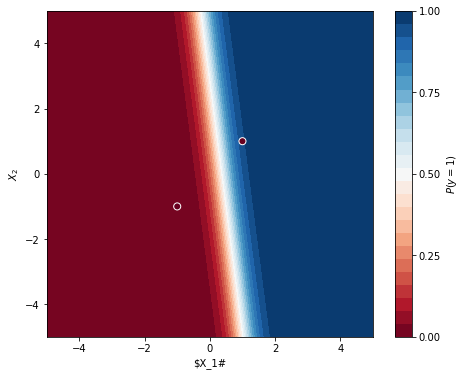

In [33]:
f,ax=plt.subplots(figsize=(8,6))
contour=ax.contourf(xx,yy,probs,25,cmap="RdBu",vmin=0,vmax=1)
ax_c=f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([[0,0.25,0.5,0.75,1]])

ax.scatter(x1_test[:,0],x1_test[:,1],c=(y1_test==1),s=50,
          cmap="RdBu",vmin=-1.2,vmax=-1.2,edgecolor="white",linewidth=1)

ax.set(aspect='equal',xlim=(-5,5),ylim=(-5,5),
      xlabel="$X_1#",ylabel="$X_2$")
plt.show()

In [37]:
#classify as features( parameter Prefix_Suffix and 13 URL_of_Anchor.) label as 13
x2=pdata.iloc[0:13,[6,14]].values
y2=pdata.iloc[0:13,30].values

In [38]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=4)


#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2_train=sc.fit_transform(x2_train)
x2_test=sc.fit_transform(x2_test)

C:\Users\DEVIL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression(C=100,random_state=0)
lr2.fit(x1_train,y1_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
lrprediction2=lr2.predict(x2_test)

In [42]:
print(lr2.score(x2_train,y2_train))
print(lr2.score(x2_test,y2_test))

0.6666666666666666
1.0


In [44]:
#misclassified samples in the test data
from sklearn.metrics import confusion_matrix
lrconfuse2=confusion_matrix(y2_test,lrprediction2)

In [45]:
#visualize the test set
xx1,yy1=np.mgrid[-5:5:.01,-5:5:.01]
grid=np.c_[xx1.ravel(),yy1.ravel()]
probs2=lrcl.predict_proba(grid)[:,1].reshape(xx1.shape)
print(probs2)

[[8.12989106e-11 8.17055455e-11 8.21142142e-11 ... 1.17595783e-08
  1.18183965e-08 1.18775089e-08]
 [8.44905622e-11 8.49131608e-11 8.53378731e-11 ... 1.22212386e-08
  1.22823659e-08 1.23437989e-08]
 [8.78075123e-11 8.82467013e-11 8.86880871e-11 ... 1.27010228e-08
  1.27645498e-08 1.28283946e-08]
 ...
 [9.99999739e-01 9.99999740e-01 9.99999742e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]
 [9.99999749e-01 9.99999750e-01 9.99999751e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]
 [9.99999758e-01 9.99999760e-01 9.99999761e-01 ... 9.99999998e-01
  9.99999998e-01 9.99999998e-01]]


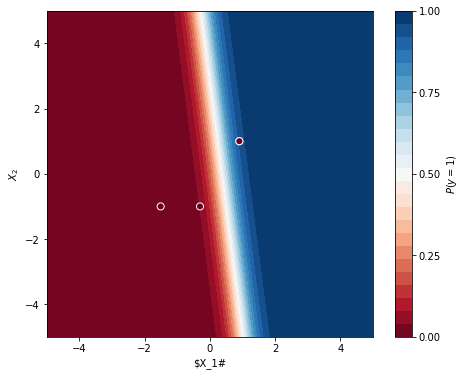

In [46]:
f1,ax1=plt.subplots(figsize=(8,6))
contour1=ax1.contourf(xx1,yy1,probs,25,cmap="RdBu",vmin=0,vmax=1)
ax_c1=f1.colorbar(contour1)
ax_c1.set_label("$P(y=1)$")
ax_c1.set_ticks([[0,0.25,0.5,0.75,1]])

ax1.scatter(x2_test[:,0],x2_test[:,1],c=(y2_test==1),s=50,
          cmap="RdBu",vmin=-1.2,vmax=-1.2,edgecolor="white",linewidth=1)

ax1.set(aspect='equal',xlim=(-5,5),ylim=(-5,5),
      xlabel="$X_1#",ylabel="$X_2$")
plt.show()